In [29]:
from PIL import Image
import glob

print('PIL Library imported!')

PIL Library imported!


In [43]:
import os

def resize_images(img_path):
    images=glob.glob(img_path + '/*.jpg')
    
    print(len(images),'images to be resized.')
    
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img,'JPEG')
        
    print(len(images),"images are resized.")
    
scissor_dir_path = os.getenv("HOME")+'/aiffel/rock_scissor_paper/scissor'
resize_images(scissor_dir_path)

print('scissor images resizing completed!')

200 images to be resized.
200 images are resized.
scissor images resizing completed!


In [44]:
rock_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"

resize_images(rock_dir_path)

print('rock images resizing completed!')

200 images to be resized.
200 images are resized.
rock images resizing completed!


In [33]:
paper_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"

resize_images(paper_dir_path)

print('paper images resizing completed!')

200 images to be resized.
200 images are resized.
paper images resizing completed!


In [39]:
scissor_test_dir_path = os.getenv("HOME")+"/aiffel/rock_scissor_paper/test/scissor"
resize_images(scissor_test_dir_path)
print('scissor test images resizing completed')

rock_test_dir_path = os.getenv("HOME")+"/aiffel/rock_scissor_paper/test/rock"
resize_images(rock_test_dir_path)
print('rock test images resizing completed')

paper_test_dir_path = os.getenv("HOME")+"/aiffel/rock_scissor_paper/test/paper"
resize_images(paper_test_dir_path)
print('paper test images resizing completed')

100 images to be resized.
100 images are resized.
scissor test images resizing completed
100 images to be resized.
100 images are resized.
rock test images resizing completed
100 images to be resized.
100 images are resized.
paper test images resizing completed


In [57]:
import numpy as np

def load_data(img_path,number_of_data=1000):
    img_size=28
    color=3
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)
    
    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img
        labels[idx]=0
        idx=idx+1
        
    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img
        labels[idx]=1
        idx=idx+1
        
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img
        labels[idx]=2
        idx=idx+1
        
    print('The number of images in train data set(x_train) is',idx)
    return imgs,labels

image_dir_path = os.getenv('HOME')+'/aiffel/rock_scissor_paper'
(x_train,y_train)=load_data(image_dir_path)
x_train_norm = x_train/225.0
image_test_dir_path = os.getenv('HOME')+'/aiffel/rock_scissor_paper/test'
(x_test,y_test) = load_data(image_test_dir_path)
x_test_norm = x_test/225.0


print('x_train shape : {}'.format(x_train.shape))
print('y_train shape : {}'.format(y_train.shape))

The number of images in train data set(x_train) is 600
The number of images in train data set(x_train) is 300
x_train shape : (1000, 28, 28, 3)
y_train shape : (1000,)


label :  0


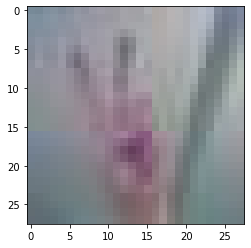

In [58]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('label : ',y_train[0])

In [59]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

n_channel_1=32
n_channel_2=32
n_dense=128
n_train_epoch=9

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))


model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=n_train_epoch)


test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               102528    
_________________________________________________________________
dense_17 (Dense)             (None, 3)                